In [58]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, auc


In [31]:
data = pd.read_csv("./winequality-red.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [32]:
print(f"Número de filas y columnas: {data.shape}")

Número de filas y columnas: (1599, 12)


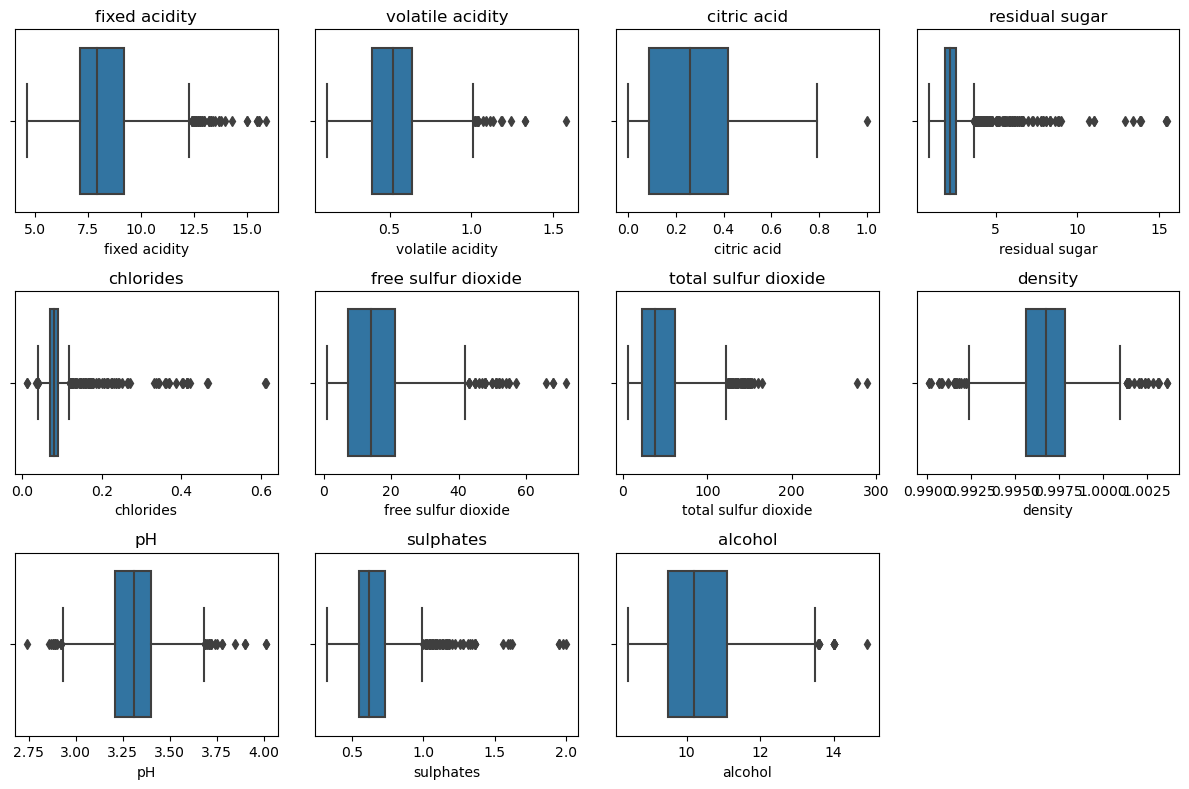

In [36]:
# Detectar valores atípicos usando box plots
plt.figure(figsize=(12, 8))
for i, col in enumerate(data.columns[:-1]):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(x=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [37]:
# Eliminar las columnas 'chlorides' y 'residual sugar'
data_limpio = data.drop(columns=['chlorides', 'residual sugar'])

# Mostrar el DataFrame resultante
data_limpio.head()

,fixed acidity,volatile acidity,citric acid,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,11.0,34.0,0.9978,3.51,0.56,9.4,5


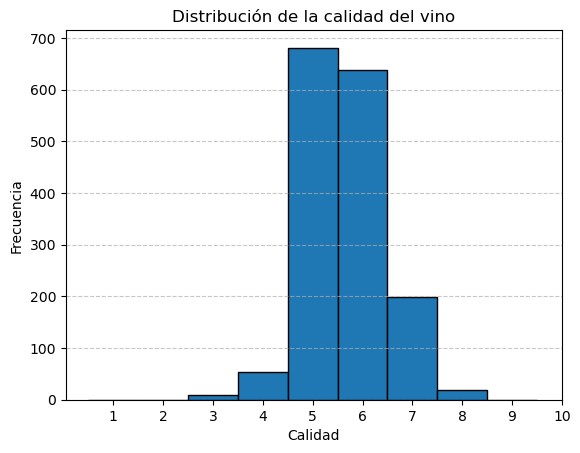

In [40]:
# Graficar histograma de la variable "quality"
plt.hist(data_limpio['quality'], bins=range(1, 11), align='left', edgecolor='black')
plt.xlabel('Calidad')
plt.ylabel('Frecuencia')
plt.title('Distribución de la calidad del vino')
plt.xticks(range(1, 11))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [41]:
predictors = data_limpio.drop(columns=['quality'])
target= data_limpio['quality']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(predictors,target, test_size=0.4, random_state=20)

[Text(0.556839127722323, 0.9722222222222222, 'x[8] <= 10.525\ngini = 0.651\nsamples = 959\nvalue = [7, 37, 397, 382, 125, 11]'),
 Text(0.38096926043557167, 0.9166666666666666, 'x[4] <= 81.5\ngini = 0.552\nsamples = 582\nvalue = [4, 26, 336, 194, 22, 0]'),
 Text(0.21021438294010888, 0.8611111111111112, 'x[7] <= 0.575\ngini = 0.586\nsamples = 466\nvalue = [4, 23, 239, 178, 22, 0]'),
 Text(0.07713248638838476, 0.8055555555555556, 'x[8] <= 9.75\ngini = 0.502\nsamples = 179\nvalue = [2, 16, 119, 39, 3, 0]'),
 Text(0.023933756805807622, 0.75, 'x[8] <= 9.075\ngini = 0.366\nsamples = 110\nvalue = [0, 10, 86, 13, 1, 0]'),
 Text(0.007259528130671506, 0.6944444444444444, 'x[5] <= 0.996\ngini = 0.625\nsamples = 8\nvalue = [0, 2, 2, 4, 0, 0]'),
 Text(0.003629764065335753, 0.6388888888888888, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0, 0, 0, 0]'),
 Text(0.010889292196007259, 0.6388888888888888, 'x[7] <= 0.54\ngini = 0.444\nsamples = 6\nvalue = [0, 0, 2, 4, 0, 0]'),
 Text(0.007259528130671506, 0.5833

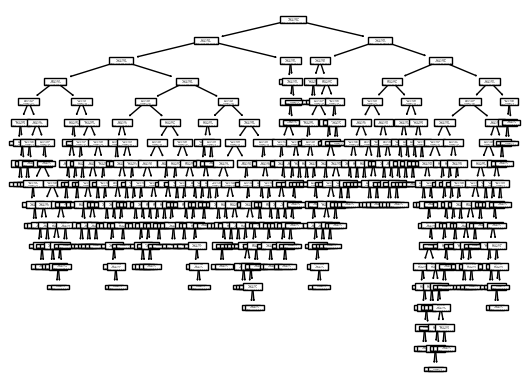

In [43]:
tree = DecisionTreeClassifier()

arbol = tree.fit(X_train, y_train)
plot_tree(arbol)

In [53]:
# Hacer predicciones en el conjunto de prueba
predicciones = arbol.predict(X_test)

# Crear la tabla de contingencia
tabla_contingencia = pd.crosstab(y_test.values, predicciones, rownames=["Actual"], colnames=["Predicciones"])

# Mostrar la tabla de contingencia
print(tabla_contingencia)



Predicciones  3  4    5    6   7  8
Actual                             
3             0  0    1    2   0  0
4             0  2    9    4   1  0
5             1  9  186   76  12  0
6             0  6   63  154  32  1
7             0  1    6   28  38  1
8             0  0    1    5   1  0


In [49]:
y_pred = arbol.predict(X_test)

# Imprimir el informe de clasificación
print("Informe de clasificación en el conjunto de prueba:")
print(classification_report(y_test, y_pred))



Informe de clasificación en el conjunto de prueba:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.11      0.12      0.12        16
           5       0.70      0.65      0.68       284
           6       0.57      0.60      0.59       256
           7       0.45      0.51      0.48        74
           8       0.00      0.00      0.00         7

    accuracy                           0.59       640
   macro avg       0.31      0.32      0.31       640
weighted avg       0.59      0.59      0.59       640



In [50]:
# Generar y mostrar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nMatriz de confusión:")
print(conf_matrix)


Matriz de confusión:
[[  0   0   1   2   0   0]
 [  0   2   9   4   1   0]
 [  1   9 186  76  12   0]
 [  0   6  63 154  32   1]
 [  0   1   6  28  38   1]
 [  0   0   1   5   1   0]]


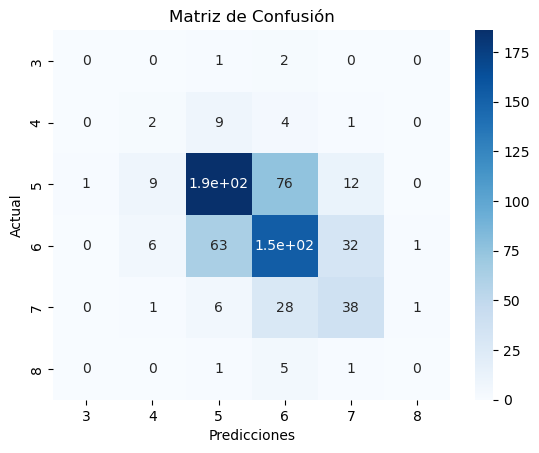

In [62]:
# Matriz de confusión
sns.heatmap(tabla_contingencia, annot=True, cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Actual')
plt.show()